# LSTM model using monthly-milk-production-pounds dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [6]:
df=pd.read_csv('monthly-milk-production-pounds.csv')

In [10]:
df.shape

(168, 2)

<Axes: >

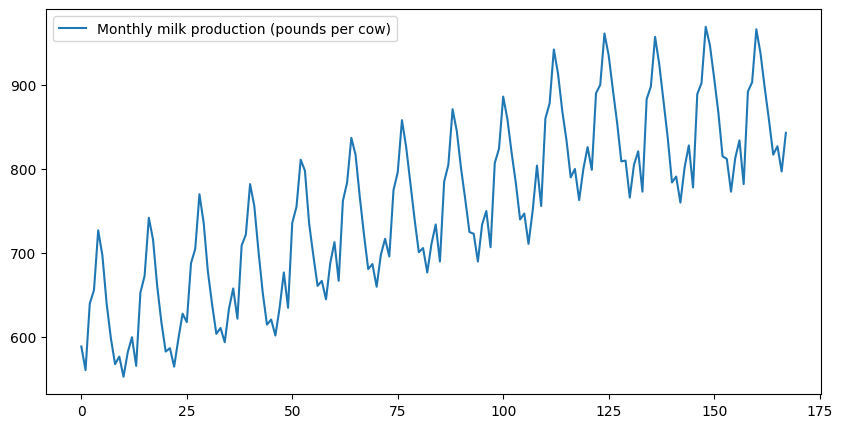

In [11]:
df.plot(figsize=(10,5))

In [7]:
df.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [12]:
train = df.iloc[:156]
test = df.iloc[156:]

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df['Month'] = pd.to_datetime(df['Month'])

df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month

df = df.drop('Month', axis=1)
train = df.iloc[:156]
test = df.iloc[156:]

scaler = MinMaxScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

Given the Array: 
[0.08653846 0.         0.         0.01923077 0.         0.09090909
 0.20913462 0.         0.18181818]
Predict this y: 
 [[0.24759615 0.         0.27272727]]


In [23]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.summary()


model.fit(generator, epochs=5)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100)                 │          41,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,701 (162.89 KB)

 Trainable params: 41,701 (162.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0797
Epoch 2/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0433
Epoch 3/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0510
Epoch 4/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487
Epoch 5/5
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0461
